<font color="#8FA31E"><b>Gender Classification using Fingerprints</b></font>

<font color="#8FA31E"><b>Requirements</b></font>

In [ ]:
from google.colab import drive
import zipfile
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<font color="#8FA31E"><b>Data Import</b></font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!ls "/content/drive/MyDrive"

'2023 -2024 Ilk Donem'
'25 May 2024 Lessons Notes'
'Adsız klasör'
 BD.zip
 Classroom
'Colab Notebooks'
'Corendon Bilgisayardan Kalanlar'
 DS
 EE221-Fall-2022-HW1.gdoc
'EE221.HW.200203009.GülfemKızıltan (1).pdf'
 EE221.HW.200203009.GülfemKızıltan.pdf
'Fashion_Recommerder_Model Dataset'
'Gülfem Kızıltan - Homework #1.gdoc'
 HalklaİlişkilerveTanıtımLisansİçerik.pdf
 LinkHW
'Opening a Spanish AB Initio class.gsheet'
 Quote_03082023_0859.pdf
 VID-20200111-WA0025.mp4
 Week01-EE221-Introduction+NumberSystems.gdoc
'Week07-08-09 EE221-Gate Level Minimization.gdoc'
 y.pdf


In [ ]:
!ls "/content/drive/MyDrive/DS"

'Gender Classification using Fingerprints.zip'


In [ ]:

drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/DS/Gender Classification using Fingerprints.zip"

extract_path = "/content/fingerprint_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)

print(os.listdir(extract_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted to: /content/fingerprint_dataset
['SOCOFing', 'socofing']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_path = "/content/fingerprint_dataset/SOCOFing/Real"

file_paths = []
labels = []

for file in os.listdir(dataset_path):
    if file.endswith(".BMP") or file.endswith(".png") or file.endswith(".jpg"):
        file_paths.append(os.path.join(dataset_path, file))

        if "__M_" in file:
            labels.append(0)  # Male
        elif "__F_" in file:
            labels.append(1)  # Female

df = pd.DataFrame({"file_path": file_paths, "label": labels})
print("Toplam number of example:", len(df))
print(df.head())

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

print("Train:", len(train_df), "Validation:", len(val_df), "Test:", len(test_df))


Toplam number of example: 6000
                                           file_path  label
0  /content/fingerprint_dataset/SOCOFing/Real/37_...      0
1  /content/fingerprint_dataset/SOCOFing/Real/357...      0
2  /content/fingerprint_dataset/SOCOFing/Real/284...      0
3  /content/fingerprint_dataset/SOCOFing/Real/178...      0
4  /content/fingerprint_dataset/SOCOFing/Real/100...      0
Train: 3840 Validation: 960 Test: 1200


<font color="#8FA31E"><b>Exploratory Data Analysis - EDA</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  6000 non-null   object
 1   label      6000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.9+ KB


In [ ]:
df.head()

,file_path,label
0,/content/fingerprint_dataset/SOCOFing/Real/37_...,0
1,/content/fingerprint_dataset/SOCOFing/Real/357...,0
2,/content/fingerprint_dataset/SOCOFing/Real/284...,0
3,/content/fingerprint_dataset/SOCOFing/Real/178...,0
4,/content/fingerprint_dataset/SOCOFing/Real/100...,0


In [ ]:
df.describe()

,label
count,6000.000000
mean,0.205000
std,0.403735
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<font color="#8FA31E"><b> Data Visualization</b>

In [ ]:
df['label_name'] = df['label'].map({0: 'Male', 1: 'Female'})

<Axes: title={'center': 'Gender Distribution'}, xlabel='label_name'>

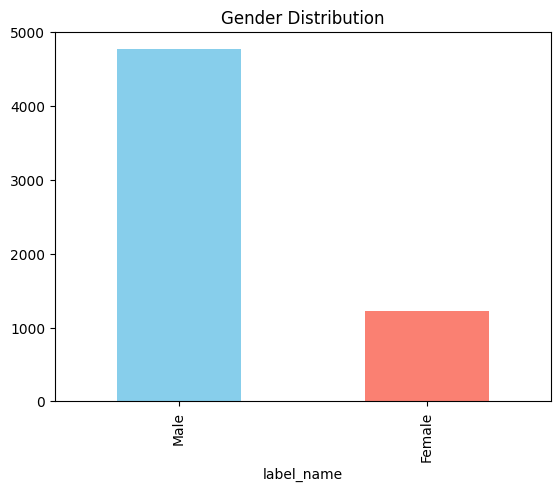

In [ ]:
df['label_name'].value_counts().plot(kind='bar', title='Gender Distribution', color=['skyblue','salmon'])

<Axes: title={'center': 'Gender Distribution'}, ylabel='count'>

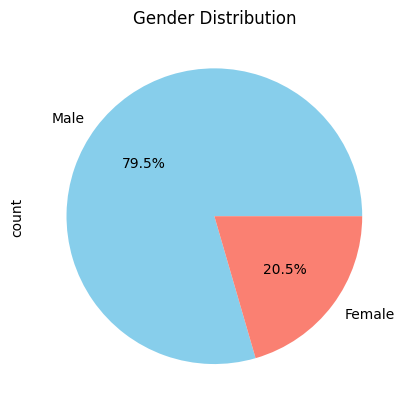

In [ ]:
df['label_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','salmon'], title='Gender Distribution')

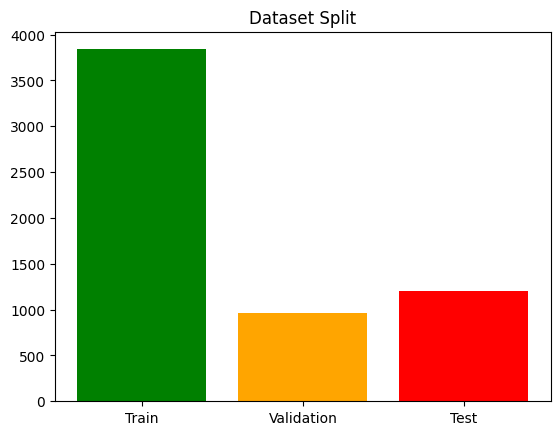

In [ ]:
sizes = [len(train_df), len(val_df), len(test_df)]
labels_split = ['Train','Validation','Test']
plt.bar(labels_split, sizes, color=['green','orange','red'])
plt.title("Dataset Split")
plt.show()

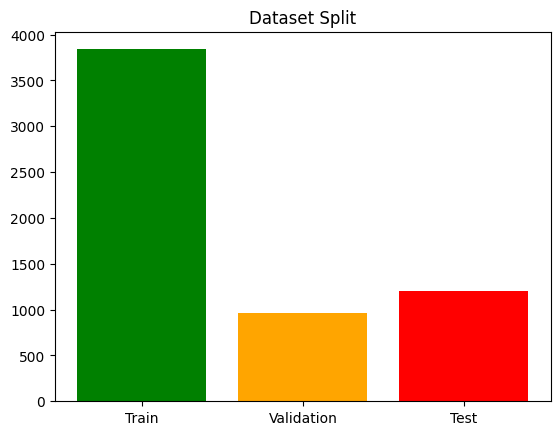

In [ ]:

sizes = [len(train_df), len(val_df), len(test_df)]
labels_split = ['Train','Validation','Test']
plt.bar(labels_split, sizes, color=['green','orange','red'])
plt.title("Dataset Split")
plt.show()

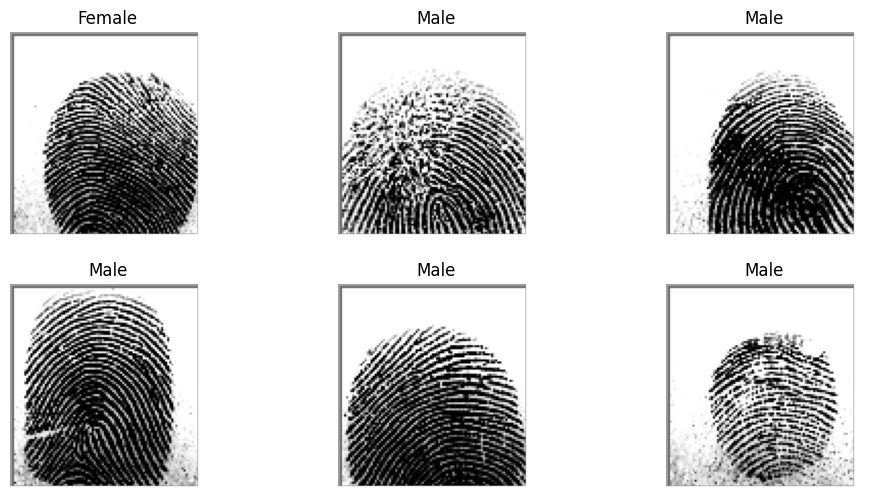

In [ ]:

sample_files = random.sample(list(df['file_path']), 6)
plt.figure(figsize=(12,6))
for i, file in enumerate(sample_files):
    img = Image.open(file)
    plt.subplot(2,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(df[df['file_path']==file]['label_name'].values[0])
    plt.axis('off')
plt.show()

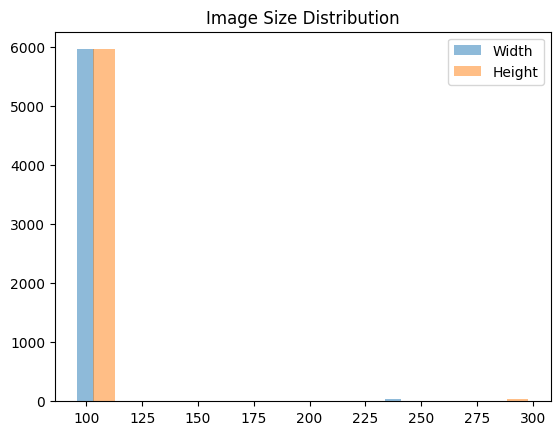

In [ ]:
widths, heights = zip(*[Image.open(f).size for f in df['file_path']])
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.legend()
plt.title("Image Size Distribution")
plt.show()

<font color="#8FA31E"><b> Data Preparation</b></font>

In [ ]:
df['label_name'] = df['label'].map({0: 'Male', 1: 'Female'})
train_df['label_name'] = train_df['label'].map({0: 'Male', 1: 'Female'})
val_df['label_name'] = val_df['label'].map({0: 'Male', 1: 'Female'})
test_df['label_name'] = test_df['label'].map({0: 'Male', 1: 'Female'})

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label_name',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='file_path',
    y_col='label_name',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 3840 validated image filenames belonging to 2 classes.
Found 960 validated image filenames belonging to 2 classes.


<font color="#8FA31E"><b> CNN Model</b></font>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop]
)



Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - accuracy: 0.7456 - loss: 0.5808 - val_accuracy: 0.7948 - val_loss: 0.5053
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 35s 292ms/step - accuracy: 0.7922 - loss: 0.5107 - val_accuracy: 0.7948 - val_loss: 0.5007
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 35s 289ms/step - accuracy: 0.7893 - loss: 0.5088 - val_accuracy: 0.7948 - val_loss: 0.5720
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 28s 235ms/step - accuracy: 0.7998 - loss: 0.4940 - val_accuracy: 0.7948 - val_loss: 0.4722
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 227ms/step - accuracy: 0.8048 - loss: 0.4898 - val_accuracy: 0.7948 - val_loss: 0.5079
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 226ms/step - accuracy: 0.7874 - loss: 0.4960 - val_accuracy: 0.7948 - val_loss: 0.4729


In [ ]:
model.save("/content/fingerprint_gender_cnn.keras")


<font color="#8FA31E"><b> Training Metrics Visualization</b></font>

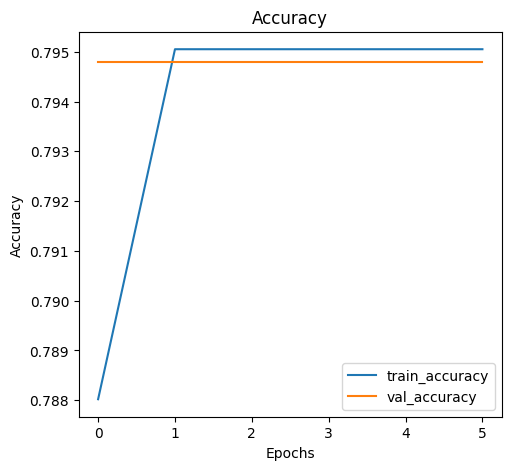

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

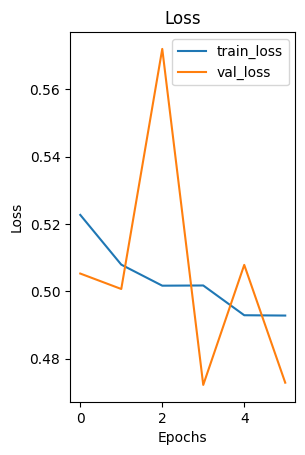

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<font color="#8FA31E"><b> Test Set Evaluation</b></font>

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_path',
    y_col='label_name',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
test_acc


Found 1200 validated image filenames belonging to 2 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7958 - loss: 0.4713


0.7950000166893005

<font color="#8FA31E"><b> Confusion Matrix</b></font>

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


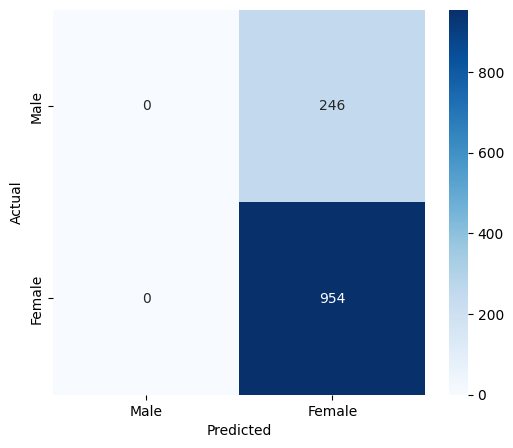

              precision    recall  f1-score   support

        Male       0.00      0.00      0.00       246
      Female       0.80      1.00      0.89       954

    accuracy                           0.80      1200
   macro avg       0.40      0.50      0.44      1200
weighted avg       0.63      0.80      0.70      1200



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(test_generator)
y_pred_labels = (y_pred > 0.5).astype(int)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male','Female'], yticklabels=['Male','Female'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_true, y_pred_labels, target_names=['Male','Female']))


<font color="#8FA31E"><b> Conclusion</b></font>

In this project, gender classification was performed using fingerprint images. A CNN model was trained on the training and validation sets. On the test set, the model achieved approximately 79.5% accuracy. This project demonstrates that biometric data can be effectively used for classification tasks using basic computer vision and deep learning techniques